Final cluster centers:
Cluster 0: [5.33333333 7.33333333]
Cluster 1: [ 2. 10.]
Cluster 2: [4.25 3.75]
The point (5, 3) belongs to cluster 2 with centroid [4.25 3.75]


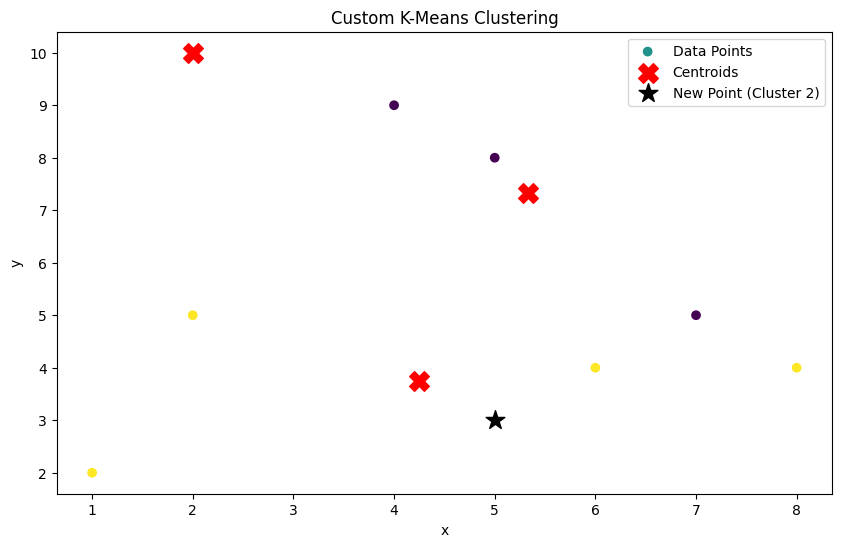

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('kmeans.csv')

# Select features for clustering
X = df[['x', 'y']].values

# K-Means implementation
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

# Apply custom K-Means
k = 3  # Number of clusters
labels, centroids = kmeans(X, k)
df['Cluster'] = labels

# Print cluster centers
print("Final cluster centers:")
for i, center in enumerate(centroids):
    print(f"Cluster {i}: {center}")

# Function to predict cluster for a new data point
def predict_cluster(new_x, new_y, centroids):
    new_point = np.array([new_x, new_y])
    distances = np.linalg.norm(centroids - new_point, axis=1)
    cluster = np.argmin(distances)
    return cluster, centroids[cluster]

# New prediction
new_x, new_y = 5, 3  
predicted_cluster, predicted_centroid = predict_cluster(new_x, new_y, centroids)
print(f"The point ({new_x}, {new_y}) belongs to cluster {predicted_cluster} with centroid {predicted_centroid}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.scatter(new_x, new_y, color='black', marker='*', s=200, label=f'New Point (Cluster {predicted_cluster})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom K-Means Clustering')
plt.legend()
plt.show()


Centroids: [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
The point (5, 3) belongs to cluster 0 with centroid [7.         4.33333333]


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


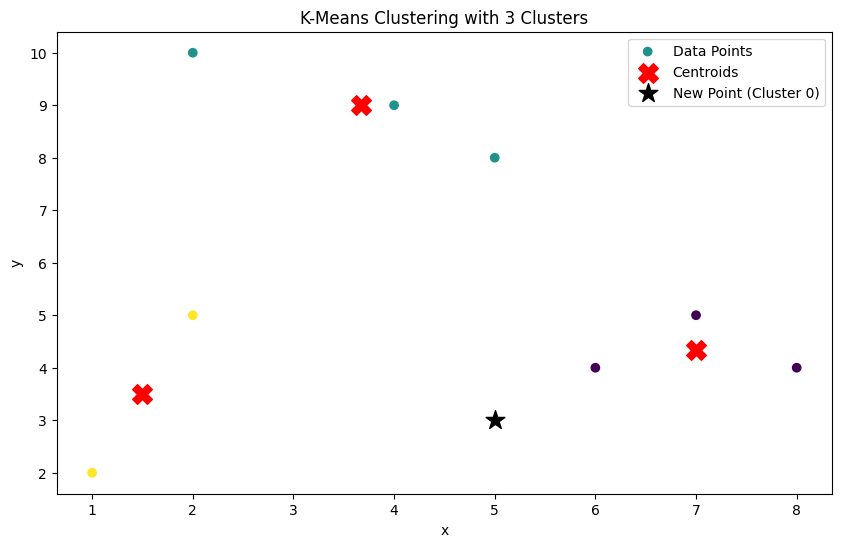

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace 'your_file.csv' with your actual file name)
df = pd.read_csv('kmeans.csv')

# Select the columns you want to use for clustering (e.g., 'x' and 'y')
X = df[['x', 'y']]

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Centroids
centroids = kmeans.cluster_centers_
print("Centroids:", centroids)

# Function to predict cluster for a new data point
def predict_cluster(new_x, new_y):
    new_point = np.array([[new_x, new_y]])
    cluster = kmeans.predict(new_point)[0]
    centroid = centroids[cluster]
    return cluster, centroid

# Example prediction
new_x, new_y = 5, 3  # Replace with your own values
predicted_cluster, predicted_centroid = predict_cluster(new_x, new_y)
print(f"The point ({new_x}, {new_y}) belongs to cluster {predicted_cluster} with centroid {predicted_centroid}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X['x'], X['y'], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.scatter(new_x, new_y, color='black', marker='*', s=200, label=f'New Point (Cluster {predicted_cluster})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means Clustering with 3 Clusters')
plt.legend()
plt.show()